In [925]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [926]:
def mean_filter(X):
    return((np.roll(X, 1, axis=0)+np.roll(X, -1, axis=0)+np.roll(X, 1, axis=1)+np.roll(X, -1, axis=1)+X)/5)

In [927]:
list_D=[0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [941]:
df_m={}
df_rho={}

for D in list_D:
    df_m[D]={}
    df_rho[D]={}
    for k in range(10):
        try:
            df_m[D][k]=pd.read_csv('runs_v1/D%s/f_profiles_m_run%d.dat'%(D,k), sep=' ', names=['t']+[str(a) for a in np.arange(400)], index_col=False, dtype=np.float64)
            df_rho[D][k]=pd.read_csv('runs_v1/D%s/f_profiles_rho_run%d.dat'%(D,k), sep=' ', names=['t']+[str(a) for a in np.arange(400)], index_col=False, dtype=np.float64)
        except:
            print(D,k)

0.6 2
0.6 9
0.7 6
0.7 9
0.8 0
0.8 1
0.8 2
0.8 3
0.8 4
0.8 5
0.8 6
0.8 7
0.8 8
0.8 9


In [ ]:
            df_m[D][k]=pd.read_csv('runs_v1/D%s/f_profiles_m_run%d.dat'%(D,k), sep=' ', names=['t']+[str(a) for a in np.arange(400)], index_col=False, dtype=np.float64)


# Exploration

In [929]:
df[0.05].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [795]:
vec_t=np.unique(df[0.3][0].t)
vec_t.shape

(101,)

In [964]:
df[0.2][0].groupby(['t']).sum().sum(axis=1).iloc[-100:]

t
1242.0     6368.0
1243.0     6216.0
1244.0     6418.0
1245.0     6534.0
1246.0     6516.0
           ...   
1337.0     9508.0
1338.0    10170.0
1339.0    10710.0
1340.0    11820.0
1341.0    11752.0
Length: 100, dtype: float64

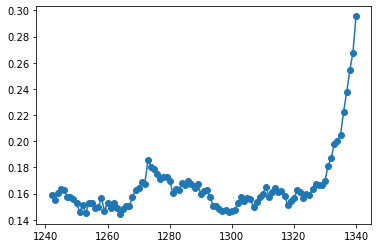

In [965]:
plt.plot(df[0.2][0].groupby(['t']).sum().sum(axis=1).iloc[-100:-1]/40000, 'o-')

In [85]:
df

{0.05: {},
 0.08: {0:          k       t    0    1    2    3    4    5    6    7  ...  390  391  \
  0      0.0  4800.0  0.0  0.0  0.0  0.0  0.0 -1.0  0.0  0.0  ...  0.0  0.0   
  1      0.0  4800.0  0.0  0.0  0.0 -1.0 -1.0  0.0  0.0  0.0  ...  1.0  0.0   
  2      0.0  4800.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
  3      0.0  4800.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
  4      0.0  4800.0  0.0  0.0  0.0  1.0  0.0  0.0 -1.0  0.0  ...  0.0  0.0   
  ...    ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
  19978  0.0  4799.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0   
  19979  0.0  4799.0  0.0 -1.0  0.0  0.0  0.0  0.0  1.0 -1.0  ...  0.0  0.0   
  19980  0.0  4799.0  0.0  0.0  0.0  0.0  0.0 -1.0 -1.0  0.0  ... -1.0  0.0   
  19981  0.0  4799.0  2.0  0.0  0.0 -1.0  0.0  0.0  0.0  0.0  ...  0.0 -1.0   
  19982  0.0  4799.0  1.0 -1.0 -1.0  0.0  0.0 -2.0 -1.0 -1.0  ... -3.0  0.0   
  
         392  393  394  395  

427.0


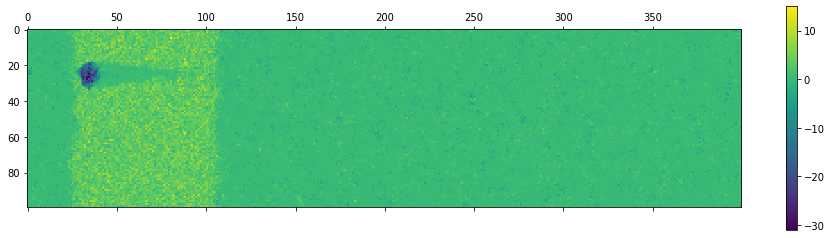

In [940]:
D=0.05
k=7
kt=110
t0=np.unique(df[D][k].t)[kt]
print(t0)
X=df[D][k][df[D][k].t==t0].drop(columns=['t', 'k'])
plt.matshow(X)
plt.colorbar()

In [129]:
D=0.1
mag_min=[]
for t0 in np.unique(df[D][k].t):
    X=df[D][k][df[D][k].t==t0].drop(columns=['t', 'k'])
    mag_min.append(np.min(np.sum(X, axis=1)))

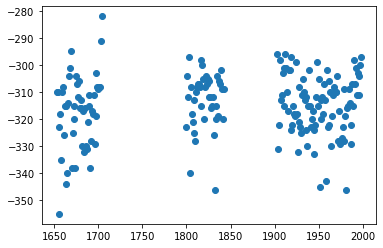

In [89]:
plt.plot(np.unique(df[D][k].t)[10:], mag_min[10:], 'o')

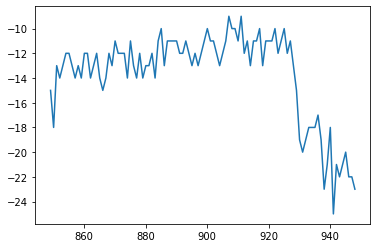

In [898]:
plt.plot(df[D][k].groupby(['t']).min().min(axis=1)[1:])

In [832]:
np.min(np.sum(X, axis=1))

-206.0

AttributeError: 'dict' object has no attribute 't'

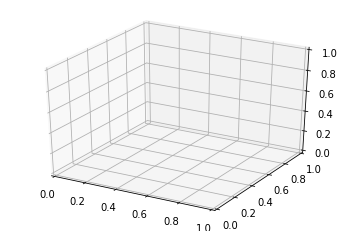

In [900]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(0, 400)
Y = np.arange(0,100)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
ax.plot_surface(X, Y, df[df.t==t0].drop(columns=['t', 'k']).values, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

In [538]:
X=df[df.t==t0].drop(columns=['t', 'k']).values

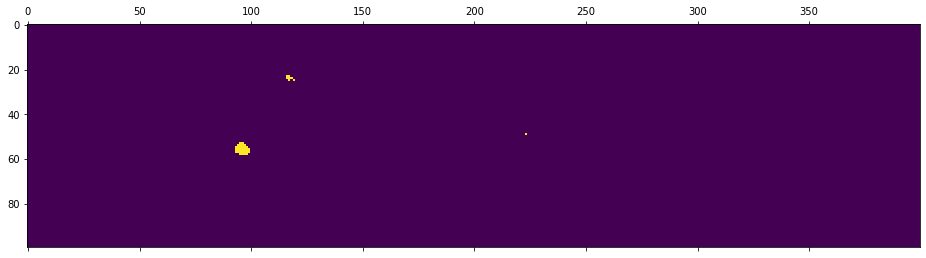

In [539]:
plt.matshow(mean_filter(X)<-3)

# Detect destabilization

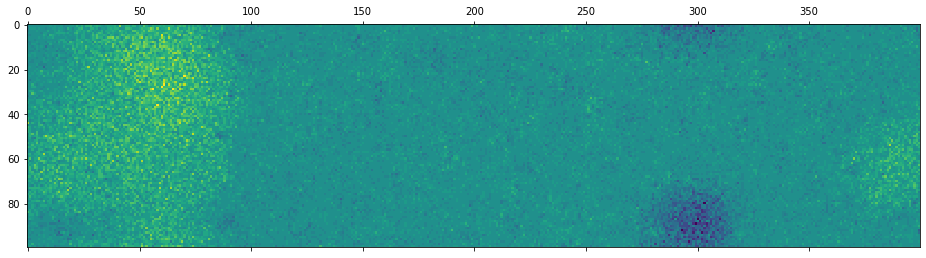

In [81]:
D=0.7
k=0
kt=50
t0=np.unique(df[D][k].t)[kt]
X=df[D][k][df[D][k].t==t0].drop(columns=['t', 'k'])
plt.matshow(X)

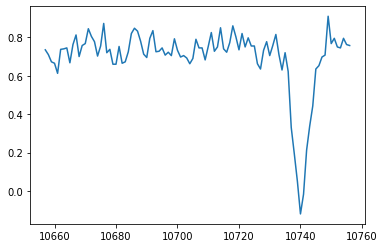

In [70]:
plt.plot(np.mean(X, axis=1))

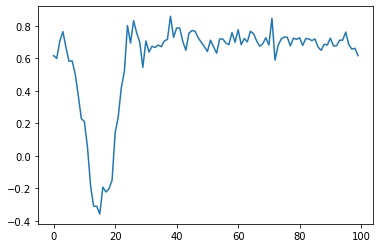

In [1280]:
plt.plot(np.mean(X.values, axis=1))

In [1281]:
ymin={}
xmin={}
for t0 in np.unique(df[D][k].t):
    X=df[D][k][df[D][k].t==t0].drop(columns=['t', 'k'])
    xmin[t0]=np.argmax(np.std(X.values, axis=0))
    #ymin[t0]=np.argmin(np.mean(X.values, axis=1))
    ymin[t0]=np.argmin(X.values[:, xmin[t0]])

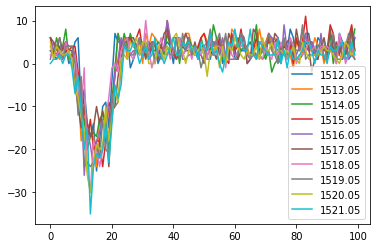

In [1282]:
for t0 in np.unique(df[D][k].t)[-10::1]:
    X=df[D][k][df[D][k].t==t0].drop(columns=['t', 'k']).values

    plt.plot(X[:, xmin[t0]], label=t0)
plt.legend()

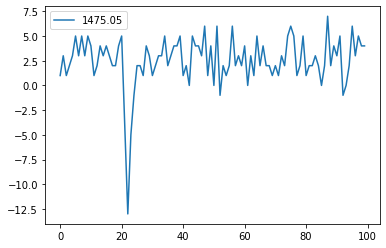

In [1158]:
t0=np.unique(df[D][k].t)[74]
X=df[D][k][df[D][k].t==t0].drop(columns=['t', 'k']).values

plt.plot(X[:, xmin[t0]], label=t0)
plt.legend()

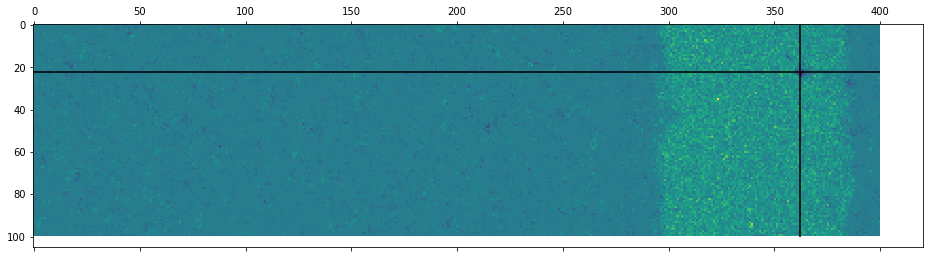

In [1212]:
D=0.1
k=1
kt=80
t0=np.unique(df[D][k].t)[kt]
X=df[D][k][df[D][k].t==t0].drop(columns=['t', 'k'])
plt.matshow(X)
plt.vlines(xmin[t0], 0, 100)
plt.hlines(ymin[t0], 0, 400)

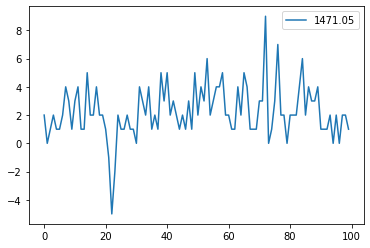

In [1177]:
t0=np.unique(df[D][k].t)[70]
X=df[D][k][df[D][k].t==t0].drop(columns=['t', 'k']).values

plt.plot(X[:, 372], label=t0)
plt.legend()

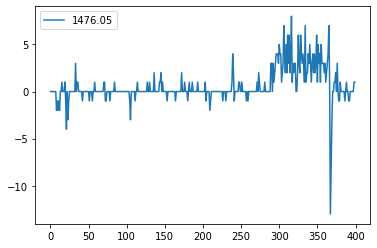

In [1211]:
t0=np.unique(df[D][k].t)[75]
X=df[D][k][df[D][k].t==t0].drop(columns=['t', 'k']).values

plt.plot(X[22, :], label=t0)
plt.legend()

343


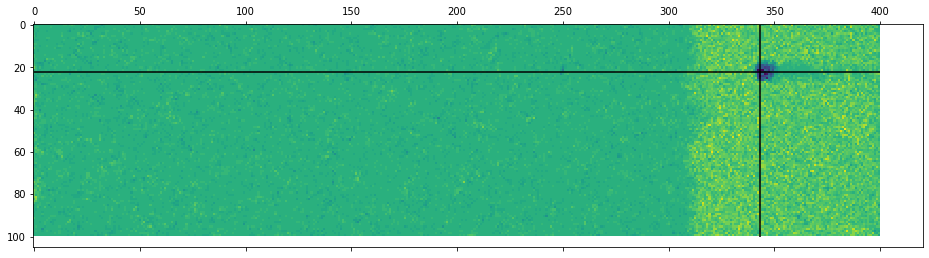

In [1251]:
D=0.1
k=1
kt=95
t0=np.unique(df[D][k].t)[kt]
X=df[D][k][df[D][k].t==t0].drop(columns=['t', 'k'])
plt.matshow(X)
plt.vlines(xmin[t0], 0, 100)
print(xmin[t0])
plt.hlines(ymin[t0], 0, 400)

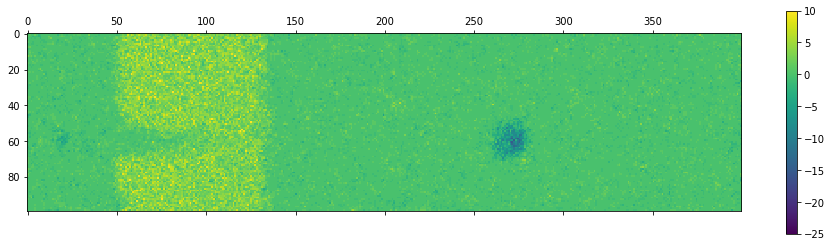

In [506]:
D=0.1
k=1
kt=-1
t0=np.unique(df[D][k].t)[kt]
X=df[D][k][df[D][k].t==t0].drop(columns=['t', 'k'])
plt.matshow(X, vmin = -25, vmax = 10)
plt.colorbar()

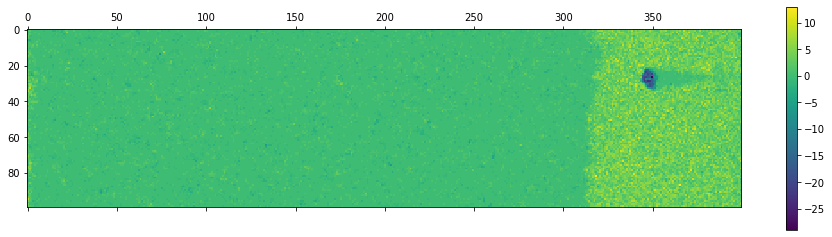

In [300]:
D=0.05
k=2
kt=-1
t0=np.unique(df[D][k].t)[kt]
X=df[D][k][df[D][k].t==t0].drop(columns=['t', 'k'])
plt.matshow(X)
plt.colorbar()
#plt.xlim(200, 220)
#plt.ylim(70,100)

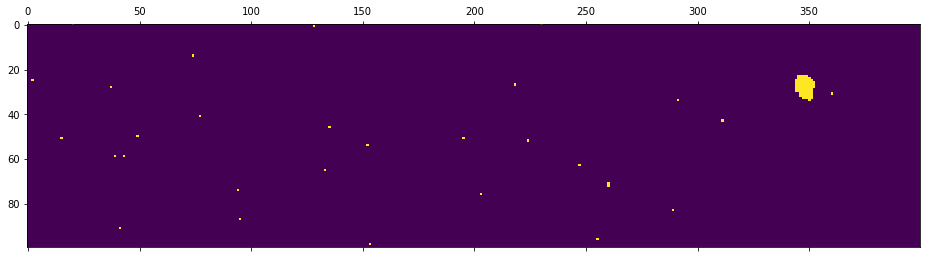

In [301]:
plt.matshow(X<-3)
#plt.xlim(200, 220)
#plt.ylim(70,100)

In [302]:
from scipy import ndimage

In [303]:
lab_array, ng = ndimage.label((X<0).values, np.ones((3,3)))
lab, nlab = np.unique(lab_array, return_counts=True)

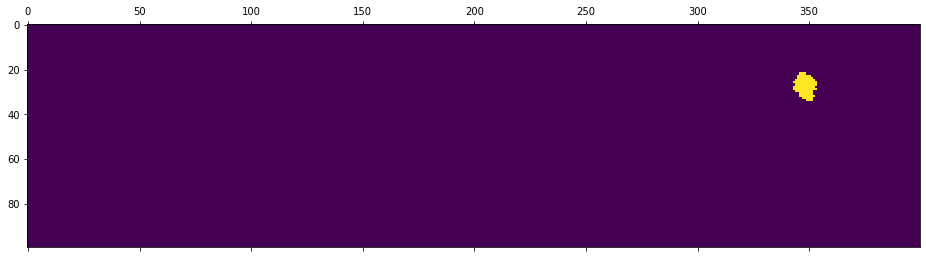

In [304]:
plt.matshow(lab_array==lab[np.argsort(nlab)[-2]])

# Surface/size

In [791]:
surf={}
size={}
trace={}
for D in list_D:
    print(D)
    surf[D]={}
    size[D]={}
    trace[D]={}
    for k in list(df_m[D]):
        surf[D][k]=[]
        size[D][k]=[]
        vec_t=np.unique(df_m[D][k].t)
        trace[D][k]=(np.zeros_like(df_m[D][k][df_m[D][k].t==vec_t[-25]].drop(columns=['t']).values))==1
        for t0 in vec_t[30:]:
            X=df_m[D][k][df_m[D][k].t==t0].drop(columns=['t']).values
        
            lab_array, ng = ndimage.label((mean_filter(X)<-2), np.ones((3,3)))
            lab, nlab = np.unique(lab_array, return_counts=True)
            try:
                X_clust=(lab_array==lab[np.argsort(nlab)[-2]])
            except:
                pass
            
            trace[D][k]=trace[D][k]|X_clust
            size[D][k].append(np.max(np.sum(X_clust, axis=0)))
            surf[D][k].append(np.sum(X_clust))
            
        lab_array_0, ng_0 = ndimage.label(trace[D][k], np.ones((3,3)))
        lab_0, nlab_0 = np.unique(lab_array_0, return_counts=True)
        trace[D][k]=(lab_array_0==lab_0[np.argsort(nlab_0)[-2]])

0.05
0.08
0.1
0.2
0.3


ValueError: operands could not be broadcast together with shapes (100,400) (95,400) 

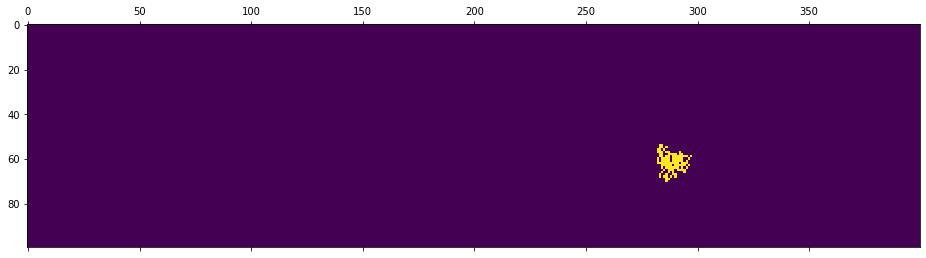

In [819]:
D=0.1
k=0

vec_t=np.unique(df_m[D][k].t)

X=df_m[D][k][df_m[D][k].t==vec_t[-22]].drop(columns=['t']).values

lab_array, ng = ndimage.label((X<-2), np.ones((3,3)))
lab, nlab = np.unique(lab_array, return_counts=True)
X_clust=(lab_array==lab[np.argsort(nlab)[-2]])
plt.matshow(X_clust)

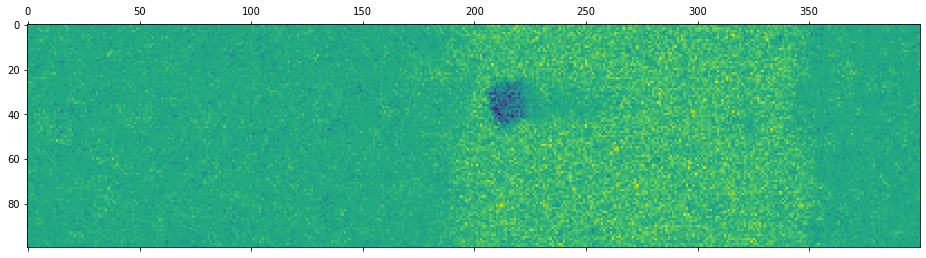

In [831]:
D=0.7
k=0
vec_t=np.unique(df_m[D][k].t)

plt.matshow(df_m[D][k][df_m[D][k].t==vec_t[100]].drop(columns=['t']).values)

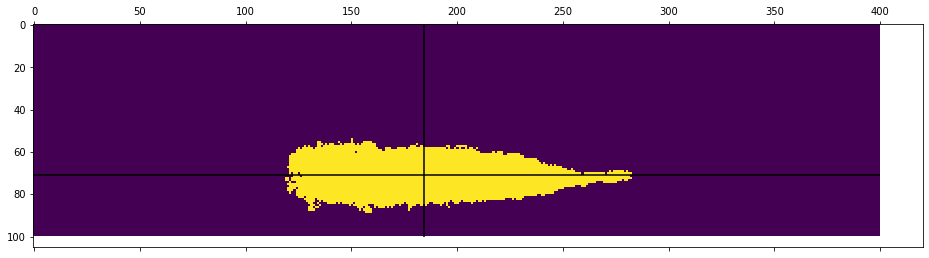

In [576]:
D=0.4
k=5
y, x = np.where(trace[D][k])
plt.matshow(trace[D][k])
plt.hlines(np.mean(y), 0, 400)
plt.vlines(np.mean(x), 0, 100)

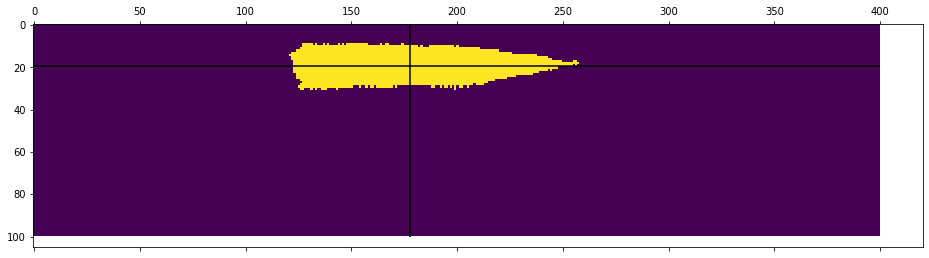

In [534]:
D=0.05
k=5
y, x = np.where(trace[D][k])
plt.matshow(trace[D][k])
plt.hlines(np.mean(y), 0, 400)
plt.vlines(np.mean(x), 0, 100)

(0, 200)

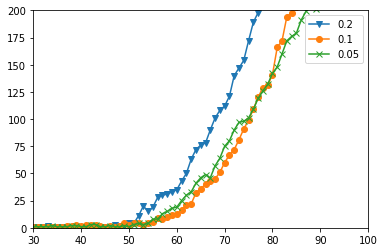

In [912]:
D=0.2
for k in [1]:#range(8):
    plt.plot(surf[D][k], 'v-', label=D)
    
D=0.1
for k in [5]:
    plt.plot(surf[D][k], 'o-', label=D)

D=0.05
for k in [5]:
    plt.plot(surf[D][k], 'x-', label=D)

    plt.legend()
plt.xlim(30,100)
plt.ylim(0,200)

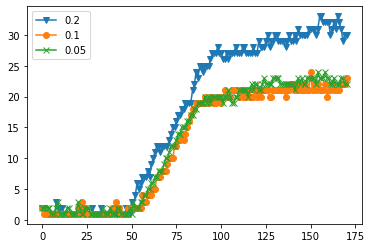

In [914]:
D=0.2
for k in [1]:#range(8):
    plt.plot(size[D][k], 'v-', label=D)
    
D=0.1
for k in [5]:
    plt.plot(size[D][k], 'o-', label=D)

D=0.05
for k in [5]:
    plt.plot(size[D][k], 'x-', label=D)

    plt.legend()
    

In [586]:
def expFit(x, a, b, c):
    return(a*np.exp(b*(x-c)))

In [587]:
from scipy.optimize import curve_fit

In [635]:
p, _ = curve_fit(expFit, vec_t[2:-1]-np.min(vec_t[2:-1]), surf, p0=[3e-4, 1e-1, -40])

In [637]:
p

array([ 3.91820541e-04,  9.80432794e-02, -3.80756620e+01])

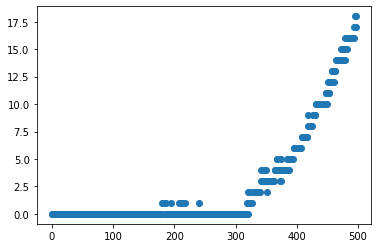

In [577]:
plt.plot(size, 'o')

In [543]:
mag=pd.read_csv('f_mag.dat', sep=' ', names=['t', 'm'])

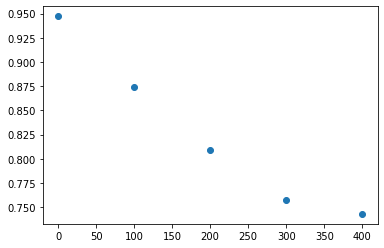

In [545]:
plt.plot(mag.t, mag.m, 'o')
#plt.hlines(np.mean(mag.m[(mag.t>1000)&(mag.t<2000)]), 0,4000, 'r')

In [170]:
th=np.mean(mag.m[(mag.t>1000)&(mag.t<2000)])

In [426]:
tstar = np.where((mag.m>.9*th)&(mag.m.shift(-1)<.9*th))[0]

In [427]:
tstar

array([], dtype=int64)

In [428]:
plt.plot(surf[tstar[0]:], 'o')
plt.plot(surf[tstar[1]:], 'o')
plt.xlim(0,30)

IndexError: index 0 is out of bounds for axis 0 with size 0

# Keep track of fluctuation

In [719]:
D=0.05
k=0
vec_t=np.unique(df_m[D][k].t)
fluct={}
fluct_m={}
fluct_magmin={}
fluct_rho={}
fluct_rhomax={}
for t0 in vec_t[30:]:
    X=df_m[D][k][df_m[D][k].t==t0].drop(columns=['t']).values
    Y=df_rho[D][k][df_rho[D][k].t==t0].drop(columns=['t']).values

    lab_array, ng = ndimage.label((mean_filter(X)<-1), np.ones((3,3)))
    lab, nlab = np.unique(lab_array, return_counts=True)

    X_clust=(lab_array==lab[np.argsort(nlab)[-2]])
    fluct[t0]=X_clust
    yf, xf = np.where(X_clust)
    fluct_m[t0]=np.mean(X[yf, xf])
    fluct_magmin[t0]=np.min(X[yf, xf])
    
    fluct_rho[t0]=np.mean(Y[yf, xf])
    fluct_rhomax[t0]=np.max(Y[yf, xf])

In [720]:
t0

1075.0

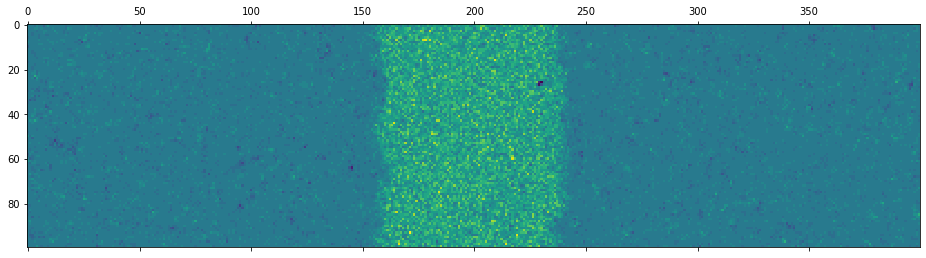

In [740]:
plt.matshow(df_m[D][k][df_m[D][k].t==np.unique(df_m[D][k].t)[84]].drop(columns=['t']).values)

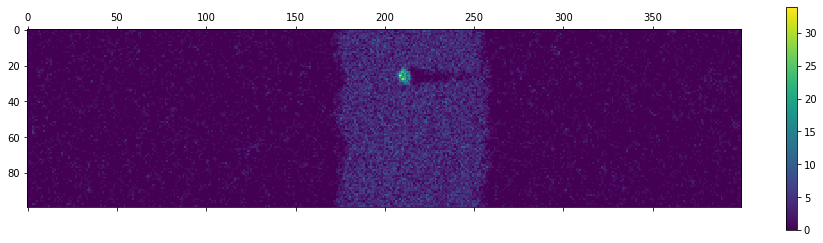

In [788]:
D=0.05
k=0
plt.matshow(df_rho[D][k][df_rho[D][k].t==np.unique(df_rho[D][k].t)[100]].drop(columns=['t']).values)
plt.colorbar()

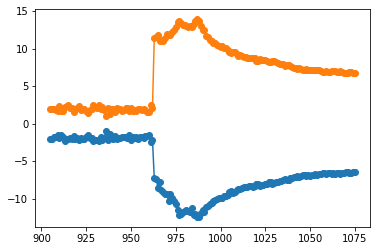

In [744]:
plt.plot(list(fluct_m), [fluct_m[t0] for t0 in fluct_m], 'o-')
plt.plot(list(fluct_rho), [fluct_rho[t0] for t0 in fluct_rho], 'o-')

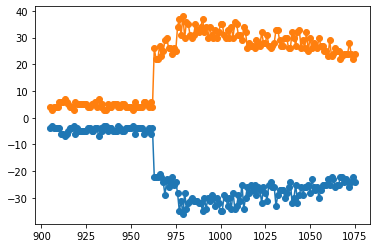

In [743]:
plt.plot(list(fluct_m), [fluct_magmin[t0] for t0 in fluct_m], '-o')
plt.plot(list(fluct_rhomax), [fluct_rhomax[t0] for t0 in fluct_rhomax], '-o')

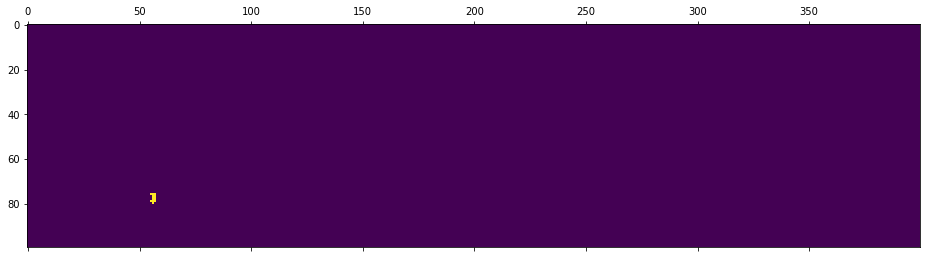

In [725]:
t0=vec_t[50]
yf, xf = np.where(fluct[t0])
X=df[D][k][df[D][k].t==np.unique(df[D][k].t)[70]].drop(columns=['t', 'k']).values
plt.matshow(fluct[t0])

# Time before destab

In [916]:
t_destab={}
for D in list_D:
    t_destab[D]=[]
    for k in range(10):
        try:
            t_destab[D].append(np.sort(df_m[D][k].t)[np.where(np.sort(df_m[D][k].t)>10)[0][0]])
        except:
            pass

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


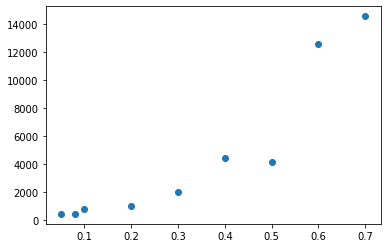

In [919]:
plt.plot(list_D, [np.mean(t_destab[D]) for D in list_D], 'o')

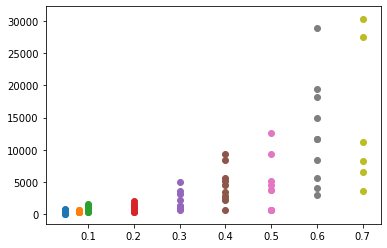

In [924]:
for D in list_D:
    plt.scatter([D for k in t_destab[D]], t_destab[D])
ax = plt.gca()
#ax.set_yscale('log')

In [836]:
df_m[0.5][0]

,t,0,1,2,3,4,5,6,7,8,...,390,391,392,393,394,395,396,397,398,399
0,9600.0,1.0,-2.0,-1.0,0.0,0.0,1.0,0.0,1.0,-2.0,...,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,9600.0,-1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,9600.0,0.0,1.0,0.0,1.0,-1.0,0.0,-1.0,0.0,1.0,...,0.0,-2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,9600.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9600.0,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,-2.0,-2.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,-3.0,-1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,9599.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
19976,9599.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19977,9599.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,...,-1.0,0.0,0.0,0.0,-1.0,0.0,2.0,3.0,-1.0,1.0
19978,9599.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0


In [868]:
df_m[0.05][0].t.unique()

array([1000., 1001., 1002., 1003., 1004., 1005., 1006., 1007., 1008.,
       1009., 1010., 1011., 1012., 1013., 1014., 1015., 1016., 1017.,
       1018., 1019., 1020., 1021., 1022., 1023., 1024., 1025., 1026.,
       1027., 1028., 1029., 1030., 1031., 1032., 1033., 1034., 1035.,
       1036., 1037., 1038., 1039., 1040., 1041., 1042., 1043., 1044.,
       1045., 1046., 1047., 1048., 1049., 1050., 1051., 1052., 1053.,
       1054., 1055., 1056., 1057., 1058., 1059., 1060., 1061., 1062.,
       1063., 1064., 1065., 1066., 1067., 1068., 1069., 1070., 1071.,
       1072., 1073., 1074., 1075.,    0.,  876.,  877.,  878.,  879.,
        880.,  881.,  882.,  883.,  884.,  885.,  886.,  887.,  888.,
        889.,  890.,  891.,  892.,  893.,  894.,  895.,  896.,  897.,
        898.,  899.,  900.,  901.,  902.,  903.,  904.,  905.,  906.,
        907.,  908.,  909.,  910.,  911.,  912.,  913.,  914.,  915.,
        916.,  917.,  918.,  919.,  920.,  921.,  922.,  923.,  924.,
        925.,  926.,

In [844]:
vec_t=np.unique(df_m[0.5][0].t)

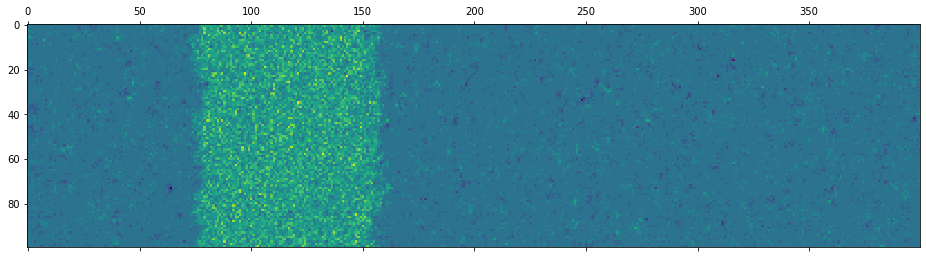

In [870]:
plt.matshow(df_m[0.05][0][df_m[0.05][0].t==877].drop(columns=['t']).values)

# Output bands before destab

In [857]:
X_mag=df_m[0.5][0][df_m[0.5][0].t==9411.0].drop(columns=['t']).values
X_rho=df_rho[0.5][0][df_rho[0.5][0].t==9411.0].drop(columns=['t']).values

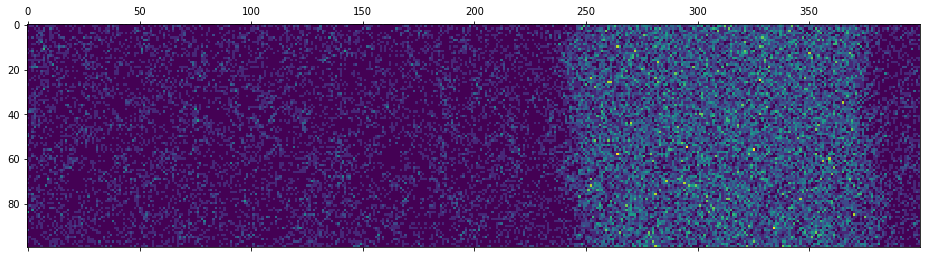

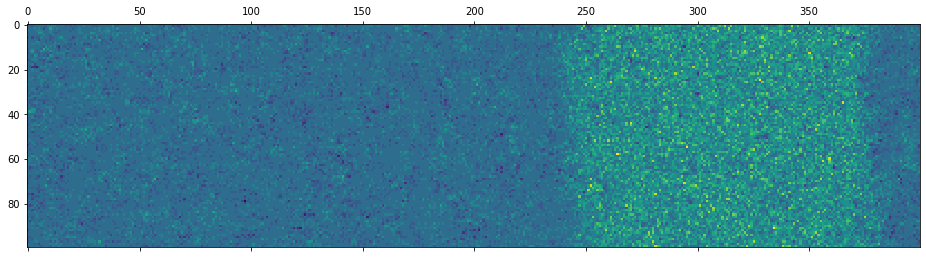

In [858]:
plt.matshow(X_rho)
plt.matshow(X_mag)

In [859]:
Xp=np.int64(0.5*(X_rho+X_mag))
Xm=np.int64(0.5*(X_rho-X_mag))

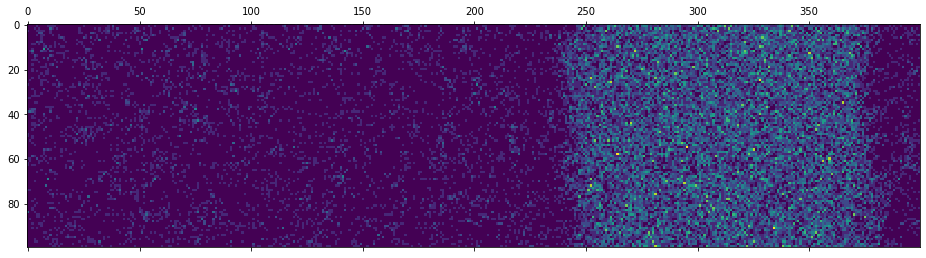

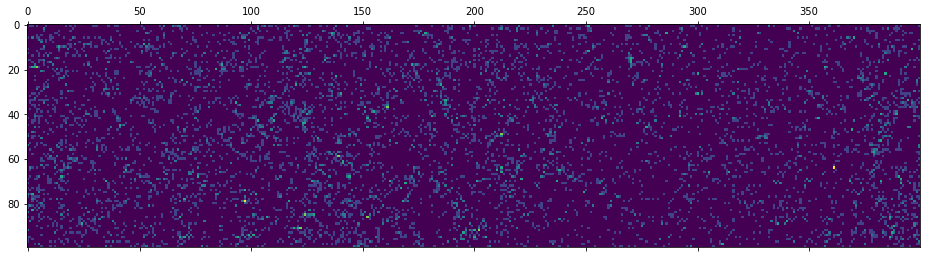

In [860]:
plt.matshow(Xp)
plt.matshow(Xm)

In [863]:
x=[]
y=[]
s=[]
for i in range(400):
    for j in range(100):
        for n in range(Xp[j][i]):
            x.append(i+np.random.rand())
            y.append(j+np.random.rand())
            s.append(1)
        for n in range(Xm[j][i]):
            x.append(i+np.random.rand())
            y.append(j+np.random.rand())
            s.append(-1)

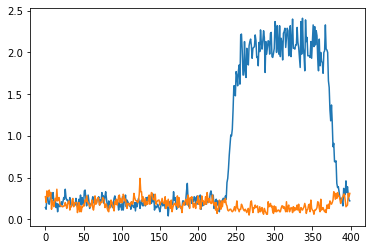

In [895]:
plt.plot(np.mean(Xp, axis=0))
plt.plot(np.mean(Xm, axis=0))

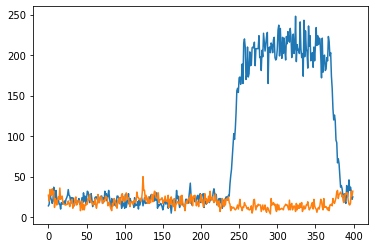

In [894]:
plt.plot(np.histogram(np.array(x)[np.array(s)==1], bins=400)[0])
plt.plot(np.histogram(np.array(x)[np.array(s)==-1], bins=400)[0])

In [901]:
np.reshape(x, (-1,1))

array([[1.20900389e-01],
       [1.15655785e-03],
       [5.05502703e-01],
       ...,
       [3.99537950e+02],
       [3.99733539e+02],
       [3.99675445e+02]])

In [902]:
np.concatenate([np.reshape(x, (-1,1)), np.reshape(y, (-1,1)), np.reshape(s, (-1,1))], axis=1)

array([[ 1.20900389e-01,  3.75475400e+00,  1.00000000e+00],
       [ 1.15655785e-03,  6.54988167e+00, -1.00000000e+00],
       [ 5.05502703e-01,  1.17806907e+01, -1.00000000e+00],
       ...,
       [ 3.99537950e+02,  9.70621866e+01, -1.00000000e+00],
       [ 3.99733539e+02,  9.73036649e+01, -1.00000000e+00],
       [ 3.99675445e+02,  9.82615724e+01, -1.00000000e+00]])

In [904]:
for D in list_D:
    vec_t=np.unique(df_m[D][0].t)
    t0=vec_t[5]
    X_mag=df_m[D][0][df_m[D][0].t==t0].drop(columns=['t']).values
    X_rho=df_rho[D][0][df_rho[D][0].t==t0].drop(columns=['t']).values
    Xp=np.int64(0.5*(X_rho+X_mag))
    Xm=np.int64(0.5*(X_rho-X_mag))
    
    x=[]
    y=[]
    s=[]
    for i in range(400):
        for j in range(100):
            for n in range(Xp[j][i]):
                x.append(i+np.random.rand())
                y.append(j+np.random.rand())
                s.append(1)
            for n in range(Xm[j][i]):
                x.append(i+np.random.rand())
                y.append(j+np.random.rand())
                s.append(-1)
    x=np.array(x)
    y=np.array(y)
    s=np.array(s)
    
    np.savetxt(fname='pos_init_D%s.dat'%D, X=np.concatenate([np.reshape(x, (-1,1)), np.reshape(y, (-1,1)), np.reshape(s, (-1,1))], axis=1))

KeyError: 0